In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from scipy import stats
from collections import Iterator
from scipy.stats import norm


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  


In [2]:
na=['na','Na','Nan','NaN','',' ']
data=pd.read_excel('./Week2_challenge_data_source.xlsx', na_values=na)

In [60]:
data1=data[['MSISDN/Number','Dur. (ms)','Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']]
data1

,MSISDN/Number,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,3.366496e+10,1823652.0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,3.368185e+10,1365104.0,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,3.376063e+10,1361762.0,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,3.375034e+10,1321509.0,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,3.369980e+10,1089009.0,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
5,3.366819e+10,1074638.0,3.148833e+06,51181.00000,1.035153e+07,2.582603e+06,1.980032e+06,922378.00000,2.133292e+07,2.611113e+06,7.345361e+06,6.536448e+06,7.102935e+08,1.316797e+07,6.549783e+08,4.436057e+06,30307754.0,754452212.0
6,3.366537e+10,1035261.0,1.623509e+06,1482.00000,1.837897e+06,3.068975e+06,1.838947e+06,252032.00000,7.234465e+06,1.886295e+06,1.323101e+07,1.798176e+07,4.479622e+07,1.408493e+07,8.036536e+08,1.064977e+07,47925246.0,70562047.0
7,3.376349e+10,951292.0,3.103940e+06,57463.00000,1.304524e+06,2.568189e+06,2.987408e+06,512696.00000,1.218979e+07,1.973518e+07,6.858496e+06,1.207521e+07,7.489062e+08,1.614962e+07,5.376018e+08,7.714657e+06,58813016.0,775350343.0
8,3.369874e+10,941634.0,3.420430e+05,30582.00000,7.560820e+06,1.341279e+06,3.014208e+06,365861.00000,1.843664e+07,1.086087e+07,1.058726e+07,8.467177e+06,8.216713e+08,6.548349e+06,1.729205e+08,1.474903e+07,42363146.0,861612261.0
9,3.365922e+10,864482.0,1.541259e+06,44154.00000,8.601949e+06,1.763920e+05,5.224570e+05,243589.00000,1.633834e+07,6.573194e+06,1.221115e+07,9.742010e+05,8.113552e+08,1.591237e+06,6.485604e+07,1.281521e+07,22417975.0,850570347.0


In [4]:
data1.describe()

,MSISDN/Number,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.489350e+05,1.500000e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,4.188282e+10,1.046086e+05,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.447443e+12,8.103762e+04,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,3.360100e+10,7.142000e+03,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,3.365130e+10,5.744050e+04,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,3.366371e+10,8.639900e+04,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,3.368349e+10,1.324302e+05,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,8.823971e+14,1.859336e+06,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [5]:
data1.quantile([0.25,0.5,0.75])

,MSISDN/Number,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0.25,3.365130e+10,57440.50,899148.0,16448.0,2882393.0,1024279.0,892793.0,233383.0,5833501.0,5517965.0,5777156.0,5475981.0,210473253.0,4128476.0,210186872.0,4145943.0,33222010.5,243106803.0
0.50,3.366371e+10,86399.00,1794369.0,32920.0,5765829.0,2054573.0,1793505.0,466250.0,11616019.0,11013447.0,11642217.0,10996384.0,423408104.0,8291208.0,421803006.0,8267071.0,41143312.0,455841077.5
0.75,3.368349e+10,132430.25,2694938.0,49334.0,8623552.0,3088454.0,2689327.0,700440.0,17448518.0,16515562.0,17470478.0,16507268.0,633174167.0,12431624.0,631691786.0,12384148.0,49034238.5,665705544.0


,Total,Percent
MSISDN/Number,1066,0.710662
Total UL (Bytes),1,0.000667
Dur. (ms),1,0.000667
Total DL (Bytes),1,0.000667
Gaming UL (Bytes),0,0.000000


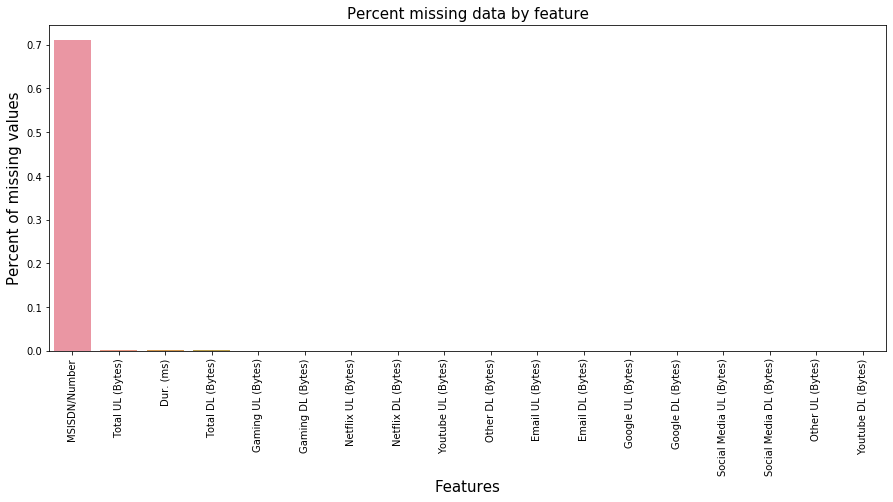

In [6]:
total = data1.isnull().sum().sort_values(ascending=False)
percent = (data1.isnull().sum()/data1.isnull().count()).sort_values(ascending=False)
percent=100*percent
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [62]:
data_i

,MSISDN/Number,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
92,3.368542e+10,243504.0,2.410108e+06,38223.00000,6.639041e+06,4.337580e+05,2.653190e+06,882020.00000,1.740089e+07,1.464440e+07,7.682779e+06,2.080655e+07,5.196206e+08,2.710989e+06,3.182977e+08,3.820483e+06,43336429.0,556406594.0
93,3.366132e+10,236570.0,3.219754e+06,10632.00000,4.259111e+06,1.476690e+06,3.507108e+06,392491.00000,1.943159e+07,1.696491e+07,1.175842e+07,9.907089e+06,7.153505e+08,1.025092e+07,2.905826e+08,1.716480e+06,40719212.0,757526492.0
95,3.361513e+10,231780.0,2.564038e+06,6720.00000,9.623320e+05,3.801300e+04,3.144169e+06,64850.00000,7.438887e+06,1.315498e+07,7.532380e+05,9.887128e+06,1.241805e+08,1.496782e+07,3.500395e+08,1.493262e+07,53052136.0,139043208.0
96,3.366495e+10,230839.0,2.555939e+06,43849.00000,8.477509e+06,1.481177e+06,3.380596e+06,156347.00000,3.334865e+06,1.445437e+07,1.791789e+07,1.530332e+06,2.934927e+08,1.362536e+06,4.953766e+08,1.168476e+07,30713366.0,329159454.0
97,3.366403e+10,238915.0,3.457278e+06,32564.00000,7.211870e+05,4.000586e+06,1.907310e+06,591277.00000,2.303902e+07,2.145768e+07,1.114842e+06,1.395830e+07,5.165083e+08,8.432981e+06,6.243970e+08,9.207067e+06,57680454.0,546747900.0
98,3.366875e+10,239954.0,5.042620e+05,64651.00000,6.798000e+03,5.539680e+05,8.326750e+05,500257.00000,1.485111e+07,1.312259e+06,1.122503e+07,1.509733e+07,5.220508e+08,1.138947e+06,2.816993e+08,3.082007e+06,21749419.0,549470626.0
100,3.362897e+10,239271.0,2.702530e+06,29784.00000,1.003725e+07,8.159830e+05,2.167338e+06,292895.00000,1.562195e+07,1.089825e+07,8.651897e+06,2.186182e+07,1.108769e+08,1.154365e+07,1.110486e+08,5.577081e+06,51019462.0,150057867.0
101,3.365867e+10,226869.0,3.002866e+06,20635.00000,2.531740e+05,1.858025e+06,1.274089e+06,746621.00000,1.040979e+07,1.351207e+07,7.893050e+06,1.588923e+07,6.942642e+07,7.249229e+06,1.505045e+08,2.759853e+06,42035664.0,92259389.0
103,3.366097e+10,227779.0,2.209476e+06,37568.00000,1.099601e+07,2.149040e+06,1.851590e+06,700214.00000,1.374303e+07,1.129542e+07,1.796794e+07,1.942740e+07,1.754547e+08,1.715699e+06,4.356253e+08,1.082246e+07,46147803.0,222222704.0
105,3.366500e+10,226854.0,2.307182e+06,26346.00000,7.753812e+06,1.634500e+05,2.541057e+06,506579.00000,2.745140e+05,8.342280e+06,1.819142e+07,2.959540e+05,6.457854e+08,1.214847e+07,2.776174e+08,1.392223e+07,35405304.0,676853430.0


In [114]:
z1 = np.abs(stats.zscore(data1))
data_i= data1[(z1 < 3).all(axis=1)]

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [63]:
100*(len(data1)-len(data_i))/len(data1)  ##percentage of outliers

20.19786534756435

since the outliers is about 20%

In [64]:
median = data_i.median()
data1.loc[((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)] = np.nan
data1.fillna(median,inplace=True)

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
data1.isnull().sum()

MSISDN/Number              0
Dur. (ms)                  0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Other DL (Bytes)           0
Other UL (Bytes)           0
Total UL (Bytes)           0
Total DL (Bytes)           0
dtype: int64

In [63]:
len(data1['MSISDN/Number'].unique()) #No of unique user

86968

In [71]:
data1.columns

Index(['MSISDN/Number', 'Dur. (ms)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtype='object')

In [66]:
data1[['Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']]=data1[['Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']]/(1024*1024)    ## converting to megabyte 

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [67]:
data1.describe()

,MSISDN/Number,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000
mean,3.365864e+10,90860.849814,1.711275,0.031419,5.484462,1.962153,1.707158,0.445087,11.078744,10.498865,11.088620,10.487909,403.480326,7.912299,401.353658,7.884029,39.226245,434.542555
std,2.007598e+07,45091.404431,0.881913,0.016193,2.818650,1.013028,0.882633,0.230024,5.714034,5.396595,5.730517,5.412873,207.778063,4.070851,207.053235,4.063591,9.544508,207.923624
min,3.360301e+10,7146.000000,0.000011,0.000000,0.000197,0.000003,0.000013,0.000002,0.000051,0.000100,0.000040,0.000033,0.002399,0.000056,0.003138,0.000141,9.071625,6.784478
25%,3.365816e+10,70112.000000,1.072007,0.019677,3.435608,1.232147,1.069905,0.278196,6.955044,6.589045,6.907789,6.559270,252.953987,4.954518,251.361482,4.948317,33.803914,284.225615
50%,3.366178e+10,86399.000000,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788
75%,3.366604e+10,101967.000000,2.349239,0.043179,7.530509,2.696078,2.348133,0.611115,15.209129,14.417328,15.242501,14.412054,553.580753,10.850677,550.187672,10.796373,44.668405,584.586124
max,3.370000e+10,244900.000000,3.419937,0.062819,10.931732,3.930432,3.420015,0.893038,22.181604,20.992243,22.181348,20.992236,804.368867,15.791697,804.369439,15.791718,69.346191,857.832130


In [75]:
data1['Dur. (ms)']=data1['Dur. (ms)']/1000 # converting to seconds
data1.columns=['MSISDN/Number', 'Dur. (s)', 'Social Media DL (MBytes)',
       'Social Media UL (MBytes)', 'Google DL (MBytes)', 'Google UL (MBytes)',
       'Email DL (MBytes)', 'Email UL (MBytes)', 'Youtube DL (MBytes)',
       'Youtube UL (MBytes)', 'Netflix DL (MBytes)', 'Netflix UL (MBytes)',
       'Gaming DL (MBytes)', 'Gaming UL (MBytes)', 'Other DL (MBytes)',
       'Other UL (MBytes)', 'Total UL (MBytes)', 'Total DL (MBytes)']
data1

,MSISDN/Number,Dur. (s),Social Media DL (MBytes),Social Media UL (MBytes),Google DL (MBytes),Google UL (MBytes),Email DL (MBytes),Email UL (MBytes),Youtube DL (MBytes),Youtube UL (MBytes),Netflix DL (MBytes),Netflix UL (MBytes),Gaming DL (MBytes),Gaming UL (MBytes),Other DL (MBytes),Other UL (MBytes),Total UL (MBytes),Total DL (MBytes)
0,3.366178e+10,86.399,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788
1,3.366178e+10,86.399,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788
2,3.366178e+10,86.399,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788
3,3.366178e+10,86.399,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788
4,3.366178e+10,86.399,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788
5,3.366178e+10,86.399,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788
6,3.366178e+10,86.399,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788
7,3.366178e+10,86.399,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788
8,3.366178e+10,86.399,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788
9,3.366178e+10,86.399,1.708838,0.031395,5.497787,1.956991,1.707857,0.443847,11.058874,10.501553,11.109609,10.484980,404.900654,7.920283,401.919772,7.883171,39.244414,435.943788


In [76]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

#cut_off1,cut_off2=Q1 - (1.5 * IQR), Q3 + (1.5 * IQR) #potential outliers lie outside the range 

data_i= data1[~((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [78]:
data_i['Total data (MBytes)']=data_i['Total UL (MBytes)']+data_i['Total DL (MBytes)']
data_i['Total Google data (MBytes)']=data_i['Google UL (MBytes)']+data_i['Google DL (MBytes)']
data_i['Total Social Media data (MBytes)']=data_i['Social Media UL (MBytes)']+data_i['Social Media DL (MBytes)']
data_i['Total Email data (MBytes)']=data_i['Email UL (MBytes)']+data_i['Email DL (MBytes)']
data_i['Total Youtube data (MBytes)']=data_i['Youtube UL (MBytes)']+data_i['Youtube DL (MBytes)']
data_i['Total Netflix data (MBytes)']=data_i['Netflix UL (MBytes)']+data_i['Netflix DL (MBytes)']
data_i['Total Gaming data (MBytes)']=data_i['Gaming UL (MBytes)']+data_i['Gaming DL (MBytes)']
data_i['Total Other data (MBytes)']=data_i['Other UL (MBytes)']+data_i['Other DL (MBytes)']


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [79]:
data_i.columns[2:18]

Index(['Social Media DL (MBytes)', 'Social Media UL (MBytes)',
       'Google DL (MBytes)', 'Google UL (MBytes)', 'Email DL (MBytes)',
       'Email UL (MBytes)', 'Youtube DL (MBytes)', 'Youtube UL (MBytes)',
       'Netflix DL (MBytes)', 'Netflix UL (MBytes)', 'Gaming DL (MBytes)',
       'Gaming UL (MBytes)', 'Other DL (MBytes)', 'Other UL (MBytes)',
       'Total UL (MBytes)', 'Total DL (MBytes)'],
      dtype='object')

In [80]:
data_i.drop([i for i in data_i.columns[2:18]],axis=1, inplace=True)
data_i.groupby(['MSISDN/Number']).count().describe()

,Dur. (s),Total data (MBytes),Total Google data (MBytes),Total Social Media data (MBytes),Total Email data (MBytes),Total Youtube data (MBytes),Total Netflix data (MBytes),Total Gaming data (MBytes),Total Other data (MBytes)
count,42187.000000,42187.000000,42187.000000,42187.000000,42187.000000,42187.000000,42187.000000,42187.000000,42187.000000
mean,2.101738,2.101738,2.101738,2.101738,2.101738,2.101738,2.101738,2.101738,2.101738
std,150.992249,150.992249,150.992249,150.992249,150.992249,150.992249,150.992249,150.992249,150.992249
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,31014.000000,31014.000000,31014.000000,31014.000000,31014.000000,31014.000000,31014.000000,31014.000000,31014.000000


In [34]:
data_i.isnull().sum()

Dur. (ms)                  0
Total data                 0
Total Google data          0
Total Social Media data    0
Total Email data           0
Total Youtube data         0
Total Netflix data         0
Total Gaming data          0
Total Other data           0
dtype: int64

In [81]:
data_i.drop(['MSISDN/Number'],axis=1,inplace=True)
data_i.fillna(data_i.mean(),inplace=True)

In [84]:
data_i.describe().to_csv('describe.csv')

In [36]:
data_i.quantile([0.25,0.5,0.75])

,Dur. (ms),Total data,Total Google data,Total Social Media data,Total Email data,Total Youtube data,Total Netflix data,Total Gaming data,Total Other data
0.25,54405.75,2.850867e+08,4941228.00,932170.75,1358193.00,15994339.0,15990365.0,2.194548e+08,2.186689e+08
0.50,86399.00,4.982205e+08,7811699.50,1823707.00,2259906.50,22651034.0,22650605.5,4.328097e+08,4.296025e+08
0.75,120380.00,7.073143e+08,10673037.25,2728518.00,3158404.25,29261285.5,29264551.5,6.420707e+08,6.391268e+08


##The dataset is large , there is need for subsampling for easy visualization

In [86]:
dfSample=data_i.sample(500)

dfSample.describe()

,Dur. (s),Total data (MBytes),Total Google data (MBytes),Total Social Media data (MBytes),Total Email data (MBytes),Total Youtube data (MBytes),Total Netflix data (MBytes),Total Gaming data (MBytes),Total Other data (MBytes)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,83.408902,478.207355,7.593877,1.798062,2.147708,21.578274,21.614970,415.572635,411.710555
std,22.961331,183.134321,2.685548,0.838078,0.829420,7.047230,6.834284,182.569963,187.136325
min,23.405000,51.642089,0.308484,0.039990,0.143861,0.944834,0.648956,4.979112,1.742714
25%,86.395250,385.991001,6.644975,1.459619,1.763295,19.064998,18.740082,317.415551,353.540853
50%,86.399000,475.188202,7.454777,1.740233,2.151704,21.560426,21.594588,412.820937,409.802943
75%,86.399000,565.300660,8.937849,2.273591,2.572831,24.343467,24.352320,500.596121,501.549815
max,149.717000,882.288667,14.343274,3.427913,4.186579,40.345437,41.701988,801.525800,809.618046


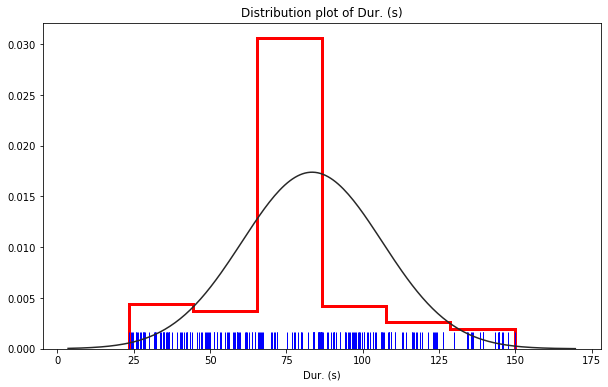

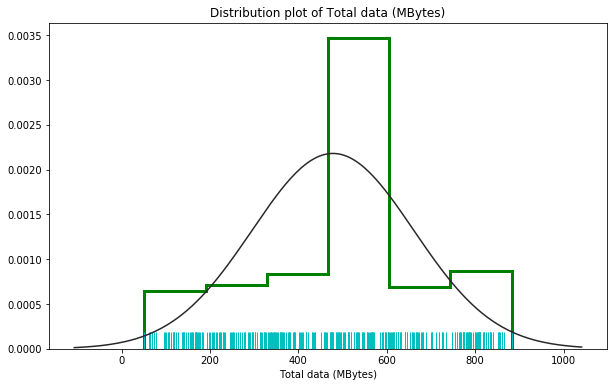

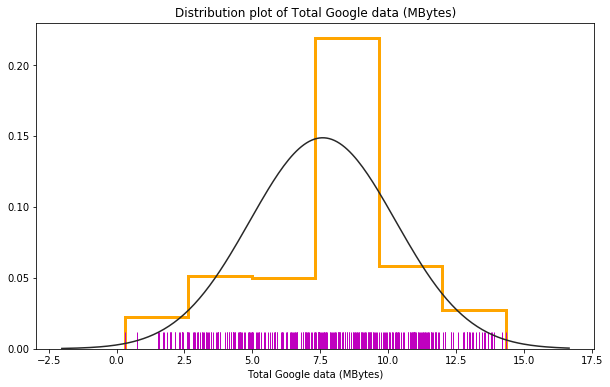

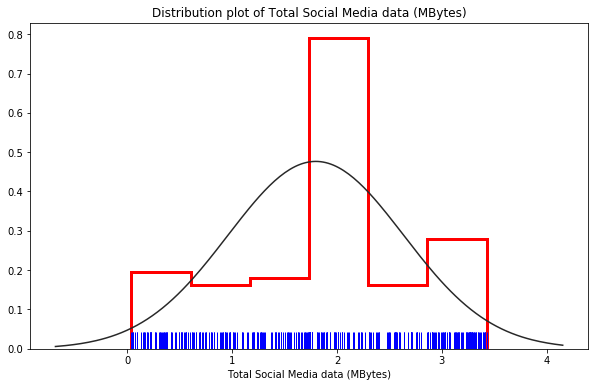

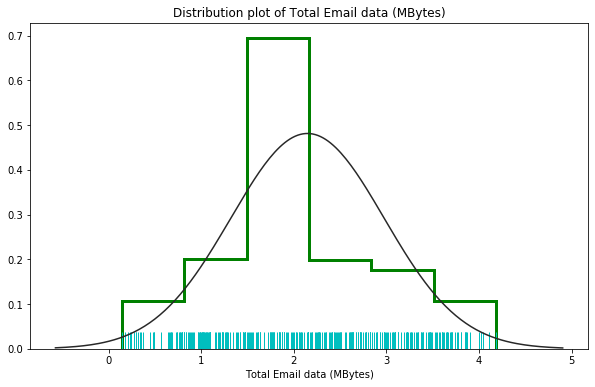

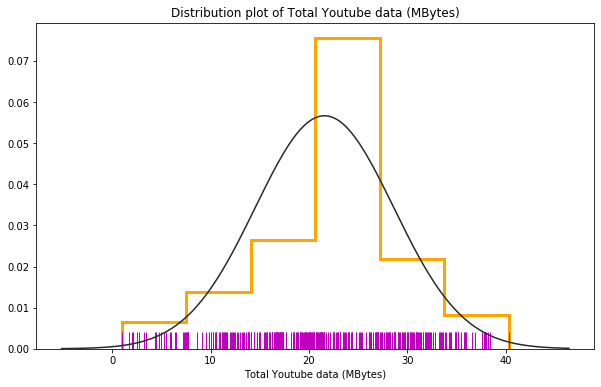

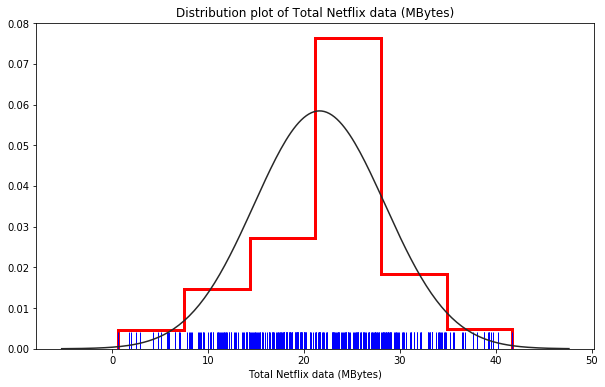

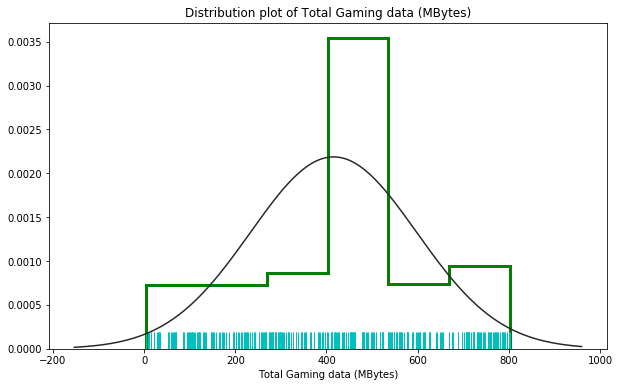

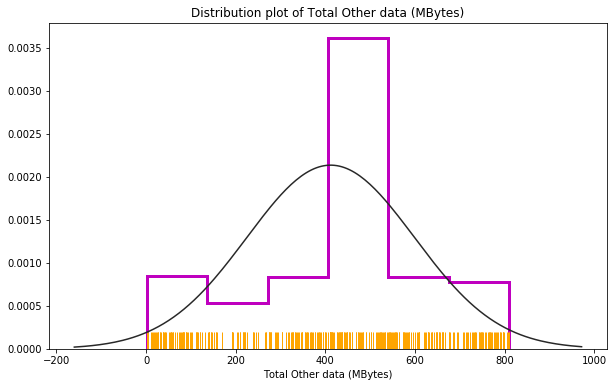

In [95]:
colour=['r','b','g','c','orange','m','r','b','g','c','orange','m','r','b','g','c','m','orange',
       'r','b','g','c','orange','m','r','b','g','c','orange','m','r','b','g','c','m','orange']
colour=iter(colour)
for i in dfSample.columns:
    name=i
    fig,ax=plt.subplots(figsize=(10, 6))
    c1=next(colour)
    c2=next(colour)
    sns.distplot(dfSample[i],ax=ax,bins=6,color=c1,rug=True,fit=norm,kde=False,
                 rug_kws={"color": c2},
                hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": c1})
    #ax.set_xlabel\
    ax.set_title('Distribution plot of {0}'.format(i))
    
    fig.savefig(name+'.jpg')
    
    plt.show()

In [91]:
dfSample.columns

Index(['Dur. (s)', 'Total data (MBytes)', 'Total Google data (MBytes)',
       'Total Social Media data (MBytes)', 'Total Email data (MBytes)',
       'Total Youtube data (MBytes)', 'Total Netflix data (MBytes)',
       'Total Gaming data (MBytes)', 'Total Other data (MBytes)'],
      dtype='object')

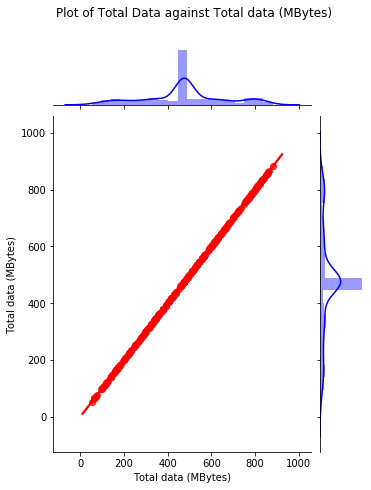

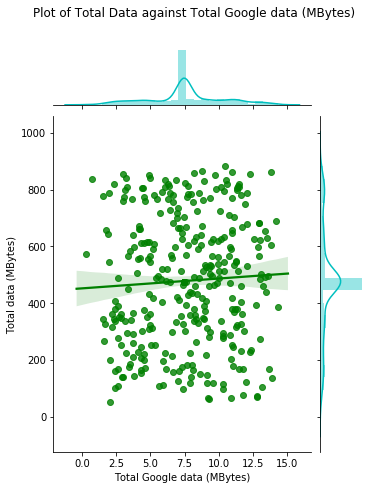

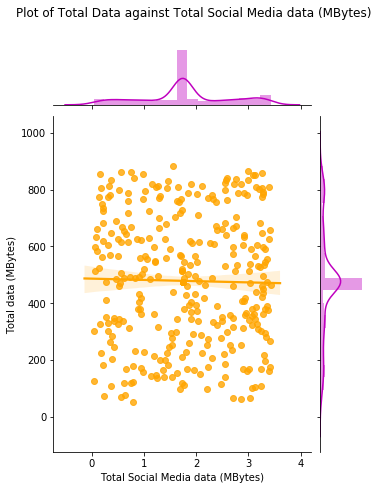

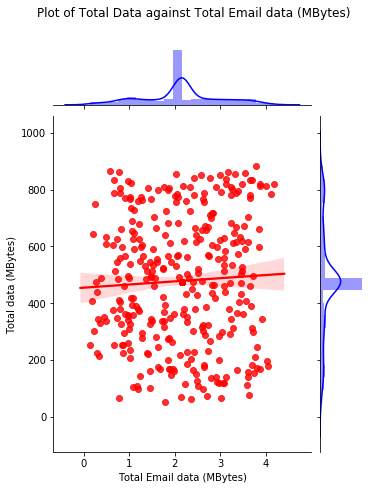

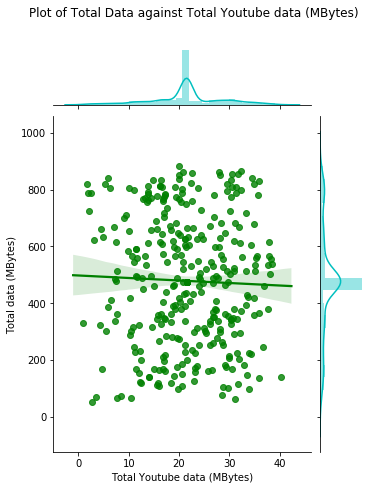

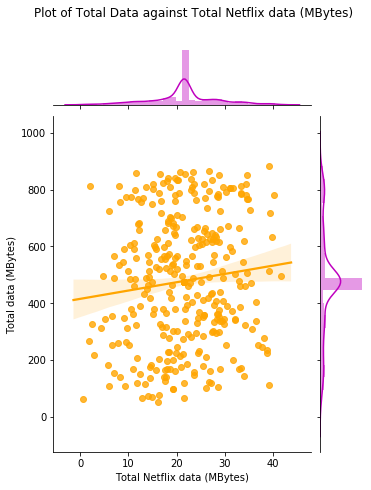

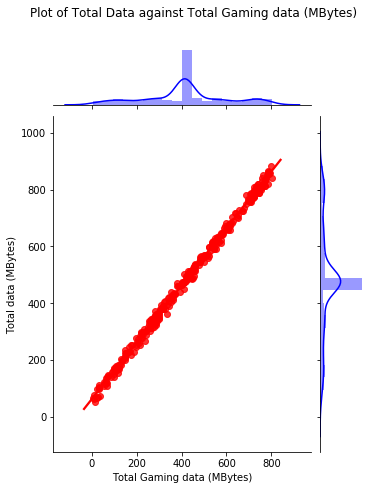

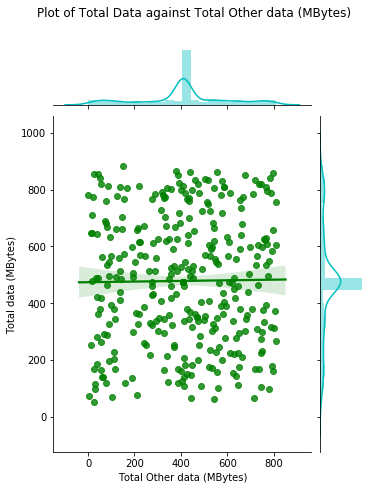

In [94]:
#dfSample.plot.hexbin(x='Total Google data', y='Total data', gridsize=15)

colour=['r','b','g','c','orange','m','r','b','g','c','orange','m','r','b','g','c','m','orange',
       'r','b','g','c','orange','m','r','b','g','c','orange','m','r','b','g','c','m','orange']
colour=iter(colour)
for i in dfSample.columns[1:]:
    if i not in['Total data','Dur. (ms)']:
        name=i
        #fig,ax=plt.subplots(figsize=(15, 6))
        c1=next(colour)
        c2=next(colour)
        g = sns.JointGrid(x=i, y='Total data (MBytes)', data=dfSample)
        g = g.plot_joint(sns.regplot,color=c1)
        g = g.plot_marginals(sns.distplot, kde=True, color=c2)
        #g=sns.jointplot(x=i, y='Total data', data=dfSample,kind="hex", color=c1)
        #ax.set_xlabel
        plt.subplots_adjust(top=0.9)
        g.fig.set_size_inches(5,7)
        g.fig.suptitle('Plot of Total Data against {0}'.format(i))
        g.savefig(name+ 'Total'+'.jpg')
        plt.show()